# **Anomaly Detection & Time Series |Assignment**

Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.

- Anomaly detection is a technique in data analysis and machine learning used to identify unusual patterns, outliers, or deviations from expected behavior in a dataset. It helps in detecting errors, fraud, or rare events that differ significantly from the norm. There are three main types: **point anomalies**, where individual data points deviate markedly from the rest, such as a sudden spike in credit card transactions; **contextual anomalies**, where a data point is abnormal in a specific context but not in general, like an unusually high temperature for winter but normal in summer; and **collective anomalies**, where a group of related data points is anomalous together, even if individual points seem normal, such as a sudden sequence of system failures in server logs. These methods are widely used in fraud detection, network security, and predictive maintenance.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases
- Isolation Forest, DBSCAN, and Local Outlier Factor (LOF) are popular anomaly detection methods with distinct approaches and use cases. **Isolation Forest** isolates anomalies by randomly partitioning data, making it effective for high-dimensional datasets and detecting global outliers quickly, such as fraud detection in financial transactions. **DBSCAN** is a density-based clustering method that identifies anomalies as points in low-density regions, making it suitable for spatial or clustering-based tasks, like detecting unusual geographic patterns or sensor faults. **Local Outlier Factor** measures the local density deviation of a point relative to its neighbors, capturing subtle or contextual anomalies in complex datasets, such as network intrusion detection or unusual customer behavior. While Isolation Forest excels at global outlier detection, DBSCAN is best for clustering-driven anomalies, and LOF is ideal for detecting local or context-sensitive anomalies.

Question 3: What are the key components of a Time Series? Explain each with one
example.
- The key components of a time series are **trend**, **seasonality**, **cyclicality**, and **randomness (noise)**. **Trend** represents the long-term increase or decrease in the data over time, such as a steady rise in a company’s monthly sales. **Seasonality** refers to repeating patterns at fixed intervals, like higher ice cream sales every summer. **Cyclicality** captures fluctuations that occur over irregular, long-term periods due to economic or business cycles, for example, stock market cycles influenced by economic recessions and booms. **Randomness (noise)** includes irregular, unpredictable variations caused by unforeseen events, such as sudden weather changes affecting daily electricity consumption. Together, these components help in analyzing, forecasting, and understanding time-dependent data.

Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
- In time series analysis, a **stationary series** is one whose statistical properties—such as mean, variance, and autocorrelation—remain constant over time. Stationarity is crucial because many forecasting models, like ARIMA, assume the data is stationary. To **test** for stationarity, methods like the **Augmented Dickey-Fuller (ADF) test**, **KPSS test**, or visual inspection of plots (checking for trends or changing variance) are commonly used. If a series is non-stationary, it can be **transformed** into a stationary series using techniques such as **differencing** (subtracting previous observations), **logarithmic or power transformations** (to stabilize variance), or **detrending** (removing trend components). These transformations help in making the series suitable for accurate modeling and forecasting.

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application
- AR, MA, ARIMA, SARIMA, and SARIMAX are key time series models with different structures and applications. **AR (AutoRegressive)** models predict future values based on a linear combination of past observations, suitable for series with strong temporal correlation. **MA (Moving Average)** models use past forecast errors to predict future values, ideal for capturing short-term shocks or noise. **ARIMA (AutoRegressive Integrated Moving Average)** combines AR and MA components with differencing to handle non-stationary data, widely used for general forecasting tasks. **SARIMA (Seasonal ARIMA)** extends ARIMA by including seasonal terms, making it effective for data with repeating seasonal patterns, like monthly sales or temperature. **SARIMAX (Seasonal ARIMA with eXogenous variables)** further incorporates external predictors (exogenous variables) along with seasonal and non-seasonal components, useful for forecasting where external factors influence the target, such as sales influenced by promotions or holidays.


Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components

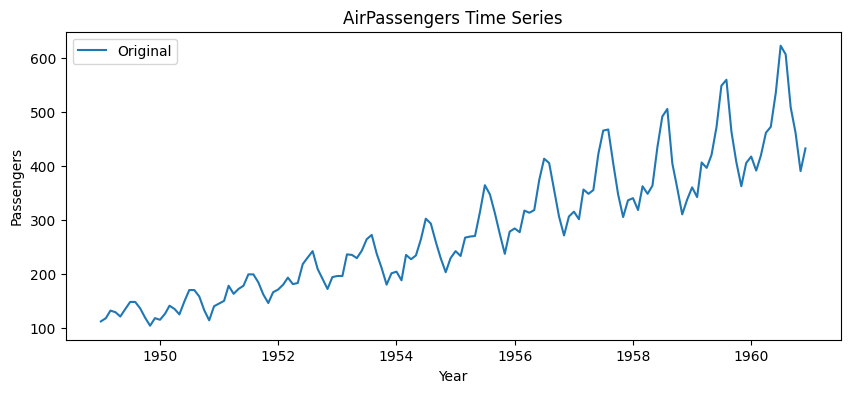

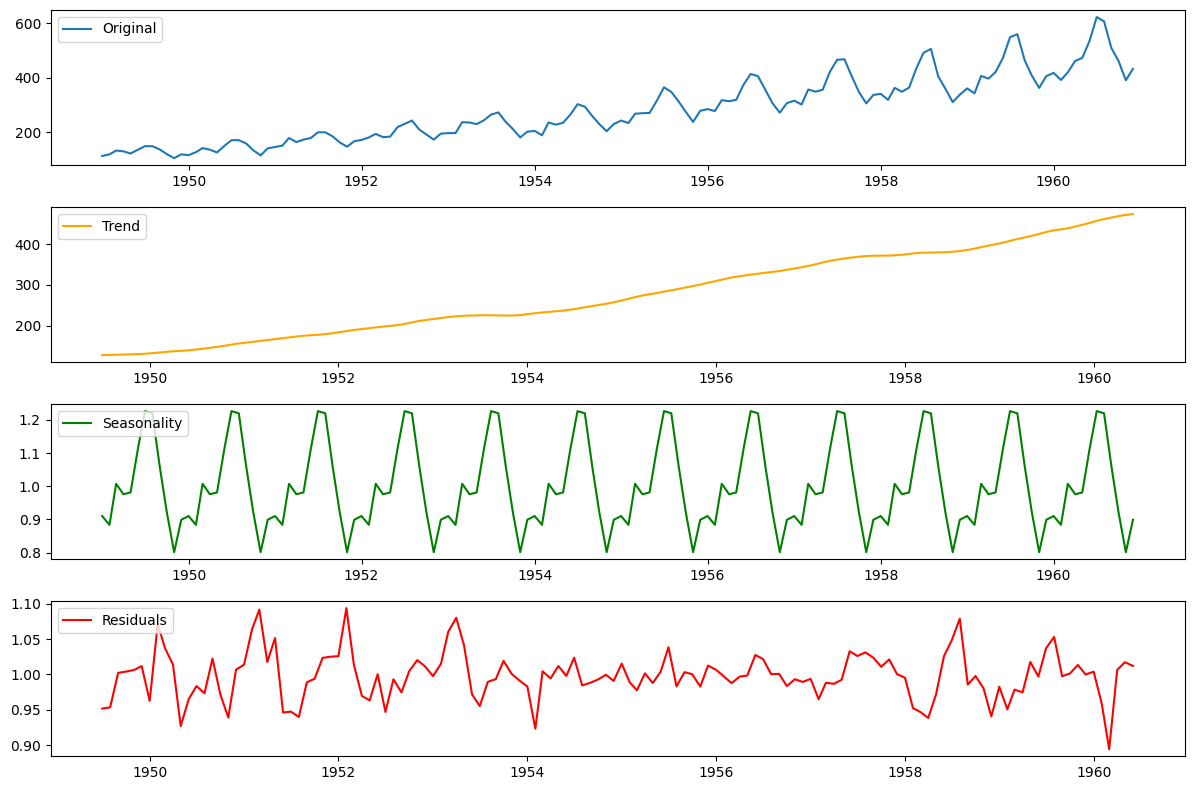

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
ts = data['Passengers']

# Plot original time series
plt.figure(figsize=(10,4))
plt.plot(ts, label='Original')
plt.title('AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Decompose time series
decomposition = seasonal_decompose(ts, model='multiplicative', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposed components
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load sample NYC Taxi dataset
url = "https://raw.githubusercontent.com/datasets/nyc-taxi-fare/master/data/nyc_taxi.csv"
data = pd.read_csv(url, nrows=5000)  # Limiting to first 5000 rows for speed
data = data[['pickup_longitude', 'pickup_latitude', 'fare_amount']].dropna()

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[['pickup_longitude', 'pickup_latitude', 'fare_amount']])

# Map anomalies (-1) and normal points (1)
data['anomaly_flag'] = data['anomaly'].map({1: 0, -1: 1})

# Visualize anomalies in a 2D scatter plot (Longitude vs Latitude)
plt.figure(figsize=(10,6))
plt.scatter(data['pickup_longitude'], data['pickup_latitude'], c=data['anomaly_flag'], cmap='coolwarm', s=10)
plt.title('Isolation Forest Anomaly Detection on NYC Taxi Fare Data')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.show()


HTTPError: HTTP Error 404: Not Found

Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


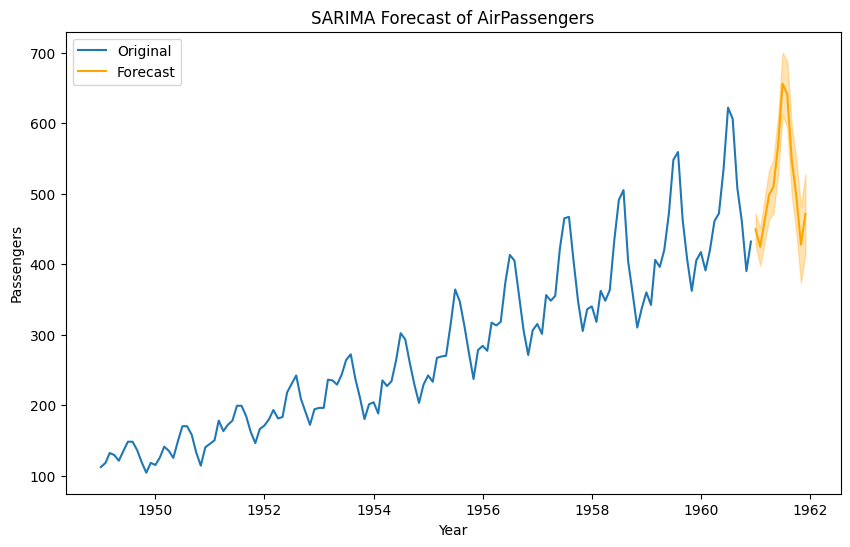

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
ts = data['Passengers']

# Split dataset into train (all data) - for demonstration
train = ts

# Define SARIMA model (Seasonal ARIMA)
# (p,d,q) x (P,D,Q,s) where s=12 for monthly seasonality
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)

# Forecast next 12 months
forecast = sarima_result.get_forecast(steps=12)
forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot original series and forecast
plt.figure(figsize=(10,6))
plt.plot(ts, label='Original')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='orange', alpha=0.3)
plt.title('SARIMA Forecast of AirPassengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()


Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.

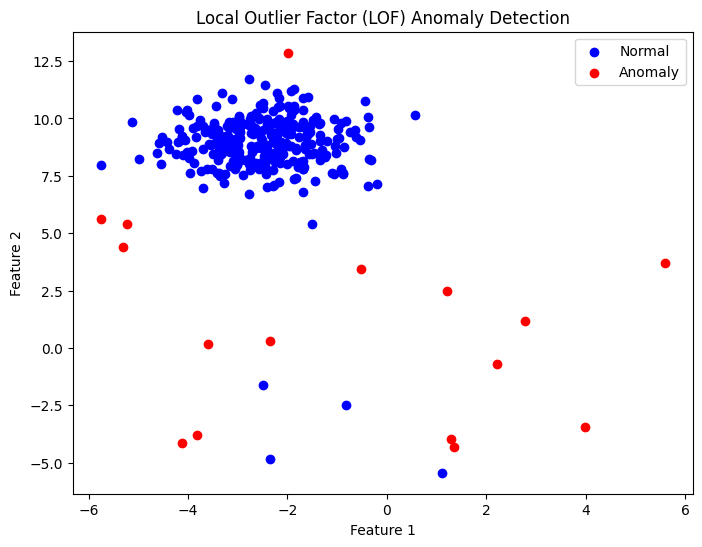

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

# Generate sample 2D data
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=1.0, random_state=42)

# Introduce some outliers
import numpy as np
np.random.seed(42)
outliers = np.random.uniform(low=-6, high=6, size=(20,2))
X = np.vstack([X, outliers])

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

# Map anomalies: -1 = anomaly, 1 = normal
anomalies = X[y_pred == -1]
normal = X[y_pred == 1]

# Plot results
plt.figure(figsize=(8,6))
plt.scatter(normal[:,0], normal[:,1], c='blue', label='Normal')
plt.scatter(anomalies[:,0], anomalies[:,1], c='red', label='Anomaly')
plt.title('Local Outlier Factor (LOF) Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?


- Here’s a structured workflow for handling real-time energy demand forecasting and anomaly detection in a power grid monitoring scenario:

---

**1. Anomaly Detection in Streaming Data:**
For real-time anomaly detection in energy consumption, I would use **Isolation Forest** or **Local Outlier Factor (LOF)** because they are well-suited for identifying unusual patterns in high-dimensional or non-linear data. Features such as energy usage, weather conditions, and region can be used. The model can be updated periodically with a sliding window of recent data to capture evolving patterns. **DBSCAN** is less suitable for streaming due to its batch-based clustering approach, though it could be used for offline analysis to detect spatial clusters of anomalies.

**2. Time Series Forecasting Model:**
For short-term (15-minute to a few hours) forecasting of energy demand, I would use **SARIMAX** because it allows modeling seasonality (daily/weekly cycles), trend, and also includes **exogenous variables** like weather conditions and region-specific factors, which strongly influence energy usage. SARIMA could work if only historical demand is considered, but SARIMAX is more flexible for incorporating external features.

**3. Validation and Performance Monitoring:**

* **Validation:** Use rolling-window cross-validation to simulate real-time predictions, evaluating metrics such as **MAE, RMSE, and MAPE**.
* **Monitoring:** Track the model’s error metrics in real time and monitor for concept drift or changes in consumption patterns. Alerts can trigger model retraining when performance deteriorates. For anomaly detection, track the frequency and distribution of flagged anomalies to ensure no drift in detection sensitivity.

**4. Business Impact:**

* **Operational Efficiency:** Early detection of abnormal spikes or drops in consumption helps prevent outages, optimize load balancing, and manage grid stability.
* **Cost Savings:** Accurate short-term forecasts enable better energy procurement and reduce wastage.
* **Decision Support:** Identifying patterns in anomalies can help maintenance scheduling, detect equipment faults, or respond to extreme weather events.
* **Customer Insights:** Understanding usage patterns allows for demand-response strategies and improved energy pricing.

---

This workflow integrates **real-time anomaly detection** with **predictive forecasting**, providing actionable insights that improve reliability, reduce costs, and enhance operational decision-making for the power grid.

If you want, I can also **draw a diagram showing this real-time workflow** for clearer visualization. Do you want me to create that?
